In [1]:
# 412 Project 
import sqlite3 as lite
import os
import sys
import numpy as np
import pandas as pd
from pyne import nucname
from pyne.material import Material
import collections
import matplotlib.pyplot as plt
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()
from IPython.display import Image

/Users/gwendolynchee/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/Users/gwendolynchee/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)


In [3]:
import analysis_astrid as an

In [4]:
# get sqlite cursor and simulation time parameters
filename = '412project_explicit.sqlite'
conn = lite.connect(filename)
cur = conn.cursor()
cur = an.get_cursor(filename)
init_year, init_month, duration, timestep = an.get_timesteps(cur)

In [36]:
# Uox waste per year (output from lwr uox)
uox_waste_amount = cur.execute('select sum(quantity), Commodity, Time, transactions.resourceid FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity = "uox_waste" group by time').fetchall()
uox_waste_list = []
for time in timestep:
    uox_waste =0
    for row in uox_waste_amount:
        if time ==row['time']:
            uox_waste = row['sum(quantity)']*1E-3
            #print(time)
            #print(uox_waste)
    uox_waste_list.append(uox_waste)


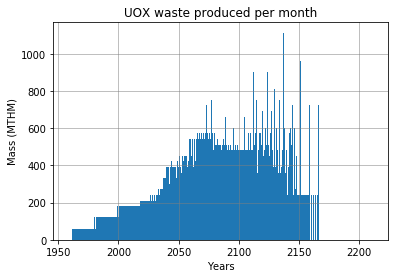

In [44]:
time = timestep/12 + init_year  

plt.bar(time, uox_waste_list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('UOX waste produced per month')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

In [45]:
# ALL reprocess waste per year (output from all reprocessing plants)
sfr_reprocess_waste_amount = cur.execute('select quantity, Commodity, Time, transactions.resourceid FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid WHERE Commodity LIKE "%reprocess_waste"').fetchall()
sfr_reprocess_waste_list = []
for time in timestep:
    sfr_reprocess_waste =0
    for row in sfr_reprocess_waste_amount:
        if time ==row['time']:
            sfr_reprocess_waste = row['quantity']*1E-3
    sfr_reprocess_waste_list.append(sfr_reprocess_waste)

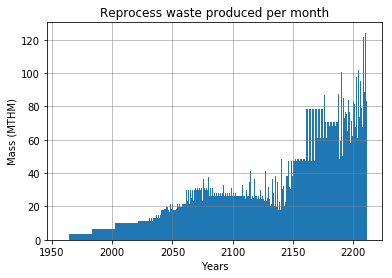

In [39]:
time = timestep/12 + init_year  

plt.bar(time, sfr_reprocess_waste_list)
plt.xlabel('Years')
plt.ylabel('Mass (MTHM)')
plt.title('Reprocess waste produced per month')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

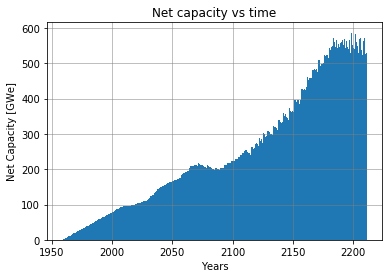

In [93]:
## Total Power generated per year 
power_generated = cur.execute('SELECT time, sum(value) FROM agententry INNER JOIN timeseriespower ON timeseriespower.AgentId = agententry.AgentId group by time').fetchall()

power_list = []

for time in timestep:
    power =0
    for row in power_generated:
        if time ==row['time']:
            power = row['sum(value)']*1E-3
    power_list.append(power)
    
time = timestep/12 + init_year  

plt.bar(time, power_list)
plt.xlabel('Years')
plt.ylabel('Net Capacity [GWe]')
plt.title('Net capacity vs time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()



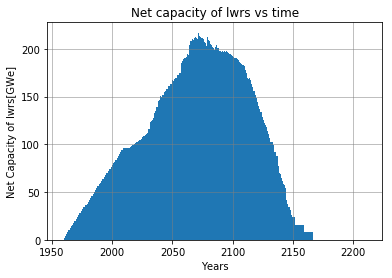

In [16]:
# Total Power generated from lwrs per year 
lwr_power_generated = cur.execute('SELECT time, sum(value) FROM agententry INNER JOIN timeseriespower ON timeseriespower.AgentId = agententry.AgentId where parentid = "46" group by time').fetchall()

lwr_power_list = []

for time in timestep:
    power =0
    for row in lwr_power_generated:
        if time ==row['time']:
            power = row['sum(value)']*1E-3
    lwr_power_list.append(power)
    
time = timestep/12 + init_year  

plt.bar(time, lwr_power_list)
plt.xlabel('Years')
plt.ylabel('Net Capacity of lwrs[GWe]')
plt.title('Net capacity of lwrs vs time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()



/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


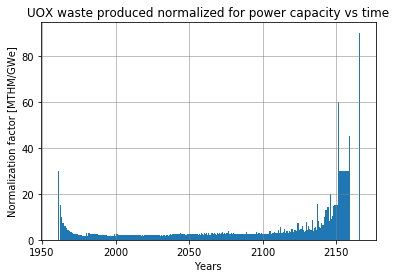

In [46]:
# Normalize uox waste mass by net capacity for LWRs
uox_waste = np.array(uox_waste_list)
lwr_power_capacity = np.array(lwr_power_list)
uox_waste_normalized = uox_waste/lwr_power_capacity 

time = timestep/12 + init_year
plt.bar(time,uox_waste_normalized)
plt.xlabel('Years')
plt.ylabel('Normalization factor [MTHM/GWe]')
plt.title('UOX waste produced normalized for power capacity vs time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

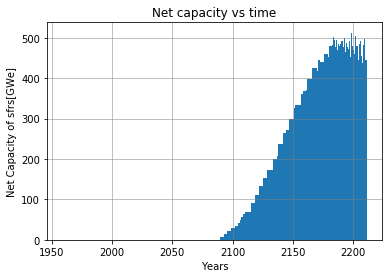

In [9]:
# Total Power generated from sfrs per year 
sfr_power_generated = cur.execute('SELECT time, sum(value) FROM agententry INNER JOIN timeseriespower ON timeseriespower.AgentId = agententry.AgentId where parentid = "47" group by time').fetchall()

sfr_power_list = []

for time in timestep:
    power =0
    for row in sfr_power_generated:
        if time ==row['time']:
            power = row['sum(value)']*1E-3
    sfr_power_list.append(power)
    
time = timestep/12 + init_year  

plt.bar(time, sfr_power_list)
plt.xlabel('Years')
plt.ylabel('Net Capacity of sfrs[GWe]')
plt.title('Net capacity vs time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()



/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


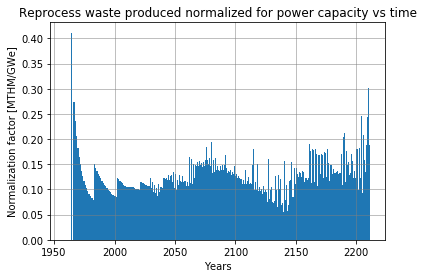

In [47]:
# Normalize reprocess waste mass by net capacity 
sfr_waste = np.array(sfr_reprocess_waste_list)
sfr_power_capacity = np.array(power_list)
sfr_waste_normalized = sfr_waste/sfr_power_capacity 

time = timestep/12 + init_year
plt.bar(time,sfr_waste_normalized)
plt.xlabel('Years')
plt.ylabel('Normalization factor [MTHM/GWe]')
plt.title('Reprocess waste produced normalized for power capacity vs time')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

sink_source_facilities has no values


/home/gyutae/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


sink_source_facilities has no values


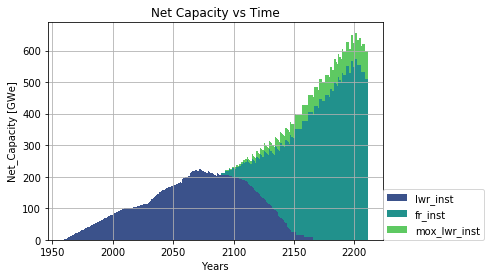

In [14]:
an.plot_power(cur)
from IPython.display import Image
Image(filename='power_plot.png')

In [41]:
# decay heat produced by uoxwaste that is produced per time step 
sink_isotope_mass = cur.execute('select time, sum(quantity)*massfrac, nucid FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid LEFT OUTER JOIN compositions ON resources.qualid = compositions.qualid WHERE commodity = "uox_waste" group by time, nucid').fetchall()

decay_heat_list2 = []
temp_dict = {}
t = 0 
decayheat_list2 = []
for time in timestep: 
    temp_dict={}
    decayheat =0
    for row in sink_isotope_mass:
        if time == row['time']:
            if time == t: 
                temp_dict.update({row['NucId']:row['sum(quantity)*massfrac']})
            elif time != t:
                temp_dict = {row['NucId']:row['sum(quantity)*massfrac']}
        t = time 
    #print(time)
    #print(temp_dict)
    a = Material(temp_dict)
    decayheat = Material.decay_heat(a)
    #print(decayheat)
    decayheatvalue = 0 
    for key1 in a:
        for key2 in decayheat:
            if key1 == key2: 
                if key1 == 952420001:
                    decayheatvalue = decayheatvalue + 0   
                else:    
                    decayheatvalue = decayheatvalue + a[key1] * decayheat[key2]*a.mass
    decayheat_list2.append(decayheatvalue)
    

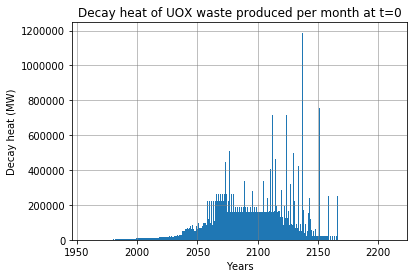

In [56]:
time = timestep/12 + init_year  

plt.bar(time, decayheat_list2)
plt.xlabel('Years')
plt.ylabel('Decay heat (MW)')
plt.title('Decay heat of UOX waste produced per month at t=0')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


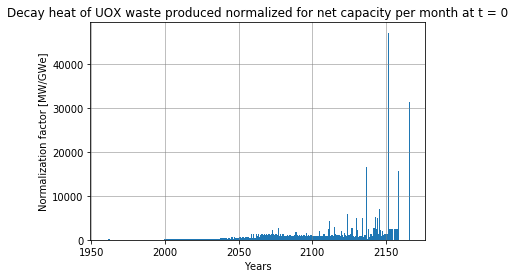

In [57]:
# decay heat produced by uox waste normalized by net capacity of lwrs 
# Normalize uox waste mass by net capacity for LWRs
uox_decayheat = np.array(decayheat_list2)
lwr_power_capacity = np.array(lwr_power_list)
uox_waste_normalized = uox_decayheat/lwr_power_capacity 

time = timestep/12 + init_year
plt.bar(time,uox_waste_normalized)
plt.xlabel('Years')
plt.ylabel('Normalization factor [MW/GWe]')
plt.title('Decay heat of UOX waste produced normalized for net capacity per month at t = 0')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

In [51]:
# decay heat produced by isotopes that are added to the sink per time step 
sink_isotope_mass = cur.execute('select time, sum(quantity)*massfrac, nucid FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid LEFT OUTER JOIN compositions ON resources.qualid = compositions.qualid WHERE commodity LIKE "%reprocess_waste" group by time, nucid').fetchall()

temp_dict = {}
t = 0 
decayheat_list = []
for time in timestep: 
    temp_dict={}
    decayheat =0
    for row in sink_isotope_mass:
        if time == row['time']:
            if time == t: 
                temp_dict.update({row['NucId']:row['sum(quantity)*massfrac']})
            elif time != t:
                temp_dict = {row['NucId']:row['sum(quantity)*massfrac']}
        t = time 
    #print(time)
    #print(temp_dict)
    a = Material(temp_dict)
    decayheat = Material.decay_heat(a)
    #print(decayheat)
    decayheatvalue = 0 
    for key1 in a:
        for key2 in decayheat:
            if key1 == key2: 
                if key1 == 952420001:
                    decayheatvalue = decayheatvalue + 0   
                else:    
                    decayheatvalue = decayheatvalue + a[key1] * decayheat[key2]*a.mass
    decayheat_list.append(decayheatvalue)

# it looks like it only starts at 2140 because before that decay heat is way smaller so it does not register 

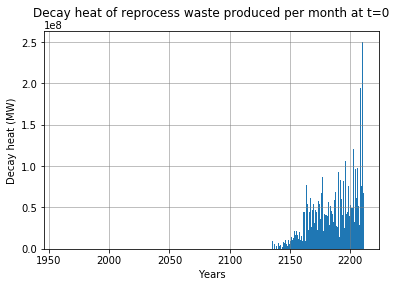

In [67]:
time = timestep/12 + init_year  

plt.bar(time, decayheat_list)
plt.xlabel('Years')
plt.ylabel('Decay heat (MW)')
plt.title('Decay heat of reprocess waste produced per month at t=0',y=1.04)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


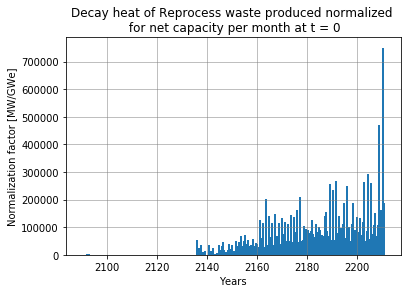

In [70]:
# decay heat produced by sfr reprocess waste normalized by net capacity of sfrs
sfr_decayheat = np.array(decayheat_list)
sfr_power_capacity = np.array(sfr_power_list)
sfr_waste_normalized = sfr_decayheat/sfr_power_capacity 

time = timestep/12 + init_year
plt.bar(time,sfr_waste_normalized)
plt.xlabel('Years')
plt.ylabel('Normalization factor [MW/GWe]')
plt.title('Decay heat of Reprocess waste produced normalized \n for net capacity per month at t = 0')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

In [19]:
# Up until here, i have looked at the decay heat of SFR reprocess waste compared to 
# uox once through waste. The normalized decay heats show that the SFR reprocess waste 
# has a higher decay heat compared to the uox waste. I think this is because this is 
# evaluated at t = 0. Lets try t = 1200 (100 years later)

In [20]:
# t = 100 years 

In [82]:
# decay heat produced by uoxwaste that is produced per time step at t = 100 years
sink_isotope_mass = cur.execute('select time, sum(quantity)*massfrac, nucid FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid LEFT OUTER JOIN compositions ON resources.qualid = compositions.qualid WHERE commodity = "uox_waste" group by time, nucid').fetchall()

temp_dict = {}
t = 0 
decayheat_list2 = []
for time in timestep: 
    temp_dict={}
    decayheat =0
    for row in sink_isotope_mass:
        if time == row['time']:
            if time == t: 
                temp_dict.update({row['NucId']:row['sum(quantity)*massfrac']})
            elif time != t:
                temp_dict = {row['NucId']:row['sum(quantity)*massfrac']}
        t = time 
    #print(time)
    #print(temp_dict)
    a = Material(temp_dict)
    b = a.decay(3e9)
    decayheat = Material.decay_heat(b)
    #print(decayheat)
    decayheatvalue = 0 
    for key1 in a:
        for key2 in decayheat:
            if key1 == key2: 
                if key1 == 952420001:
                    decayheatvalue = decayheatvalue + 0   
                else:    
                    decayheatvalue = decayheatvalue + b[key1] * decayheat[key2]*b.mass
    decayheat_list2.append(decayheatvalue)

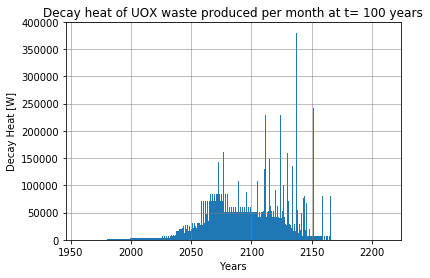

In [83]:
time = timestep/12 + init_year  

plt.bar(time, decayheat_list2)
plt.xlabel('Years')
plt.ylabel('Decay Heat [W]')
plt.title('Decay heat of UOX waste produced per month at t= 100 years')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


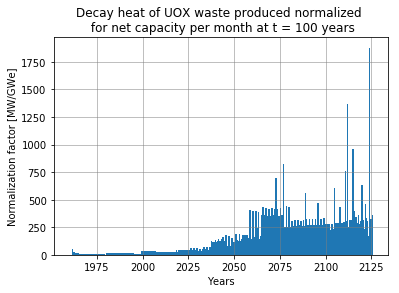

In [84]:
# decay heat produced by uox waste normalized by net capacity of lwrs 
# Normalize uox waste mass by net capacity for LWRs
uox_decayheat = np.array(decayheat_list2)
lwr_power_capacity = np.array(lwr_power_list)
uox_waste_normalized = uox_decayheat/lwr_power_capacity 

time = timestep/12 + init_year
time2 = time[:2000]
uox_waste_normalized2 = uox_waste_normalized[:2000]
plt.bar(time2,uox_waste_normalized2)
plt.xlabel('Years')
plt.ylabel('Normalization factor [MW/GWe]')
plt.title('Decay heat of UOX waste produced normalized \n for net capacity per month at t = 100 years')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

In [85]:
# decay heat produced by isotopes that are added to the sink per time step at t = 1000 years 
sink_isotope_mass = cur.execute('select time, sum(quantity)*massfrac, nucid FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid LEFT OUTER JOIN compositions ON resources.qualid = compositions.qualid WHERE commodity LIKE "%reprocess_waste" group by time, nucid').fetchall()

temp_dict = {}
t = 0 
decayheat_list = []
for time in timestep: 
    temp_dict={}
    decayheat =0
    for row in sink_isotope_mass:
        if time == row['time']:
            if time == t: 
                temp_dict.update({row['NucId']:row['sum(quantity)*massfrac']})
            elif time != t:
                temp_dict = {row['NucId']:row['sum(quantity)*massfrac']}
        t = time 
    #print(time)
    #print(temp_dict)
    a = Material(temp_dict)
    b = a.decay(3e9)
    decayheat = Material.decay_heat(b)
    #print(decayheat)
    decayheatvalue = 0 
    for key1 in a:
        for key2 in decayheat:
            if key1 == key2: 
                if key1 == 952420001:
                    decayheatvalue = decayheatvalue + 0   
                else:    
                    decayheatvalue = decayheatvalue + b[key1] * decayheat[key2]*b.mass
    decayheat_list.append(decayheatvalue)
    



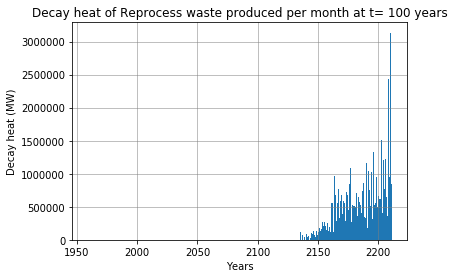

In [86]:
time = timestep/12 + init_year  

plt.bar(time, decayheat_list)
plt.xlabel('Years')
plt.ylabel('Decay heat (MW)')
plt.title('Decay heat of Reprocess waste produced per month at t= 100 years')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


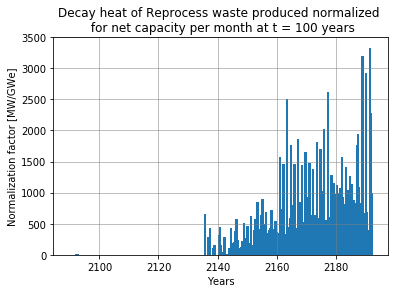

In [87]:
# decay heat produced by sfr reprocess waste normalized by net capacity of sfrs
sfr_decayheat = np.array(decayheat_list)
sfr_power_capacity = np.array(sfr_power_list)
sfr_waste_normalized = sfr_decayheat/sfr_power_capacity 

time = timestep/12 + init_year
time2 = time[1400:2800]
sfr_waste_normalized2 = sfr_waste_normalized[1400:2800]
plt.bar(time2,sfr_waste_normalized2)
plt.xlabel('Years')
plt.ylabel('Normalization factor [MW/GWe]')
plt.title('Decay heat of Reprocess waste produced normalized \n for net capacity per month at t = 100 years')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

In [88]:
# t = 1000 years 

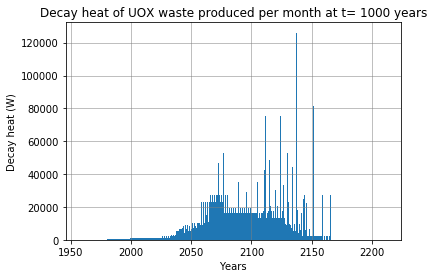

In [89]:
# decay heat produced by uoxwaste that is produced per time step at t = 1000 years
sink_isotope_mass = cur.execute('select time, sum(quantity)*massfrac, nucid FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid LEFT OUTER JOIN compositions ON resources.qualid = compositions.qualid WHERE commodity = "uox_waste" group by time, nucid').fetchall()

temp_dict = {}
t = 0 
decayheat_list2 = []
for time in timestep: 
    temp_dict={}
    decayheat =0
    for row in sink_isotope_mass:
        if time == row['time']:
            if time == t: 
                temp_dict.update({row['NucId']:row['sum(quantity)*massfrac']})
            elif time != t:
                temp_dict = {row['NucId']:row['sum(quantity)*massfrac']}
        t = time 
    #print(time)
    #print(temp_dict)
    a = Material(temp_dict)
    b = a.decay(3e10)
    decayheat = Material.decay_heat(b)
    #print(decayheat)
    decayheatvalue = 0 
    for key1 in a:
        for key2 in decayheat:
            if key1 == key2: 
                if key1 == 952420001:
                    decayheatvalue = decayheatvalue + 0   
                else:    
                    decayheatvalue = decayheatvalue + b[key1] * decayheat[key2]*b.mass
    decayheat_list2.append(decayheatvalue)
    
time = timestep/12 + init_year  

plt.bar(time, decayheat_list2)
plt.xlabel('Years')
plt.ylabel('Decay heat (W)')
plt.title('Decay heat of UOX waste produced per month at t= 1000 years')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


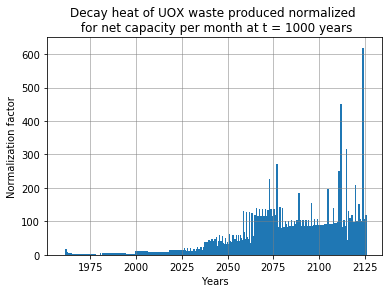

In [90]:
# decay heat produced by uox waste normalized by net capacity of lwrs 
# Normalize uox waste mass by net capacity for LWRs
uox_decayheat = np.array(decayheat_list2)
lwr_power_capacity = np.array(lwr_power_list)
uox_waste_normalized = uox_decayheat/lwr_power_capacity 

time = timestep/12 + init_year
time2 = time[:2000]
uox_waste_normalized2 = uox_waste_normalized[:2000]
plt.bar(time2,uox_waste_normalized2)
plt.xlabel('Years')
plt.ylabel('Normalization factor')
plt.title('Decay heat of UOX waste produced normalized \n for net capacity per month at t = 1000 years')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()

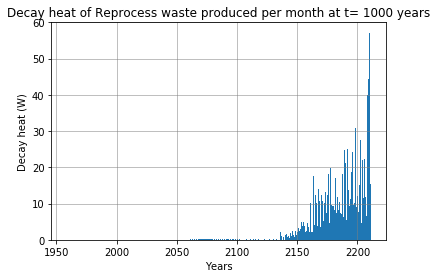

In [91]:
# decay heat produced by isotopes that are added to the sink per time step at t = 1000 years 
sink_isotope_mass = cur.execute('select time, sum(quantity)*massfrac, nucid FROM transactions INNER JOIN resources ON transactions.resourceid = resources.resourceid LEFT OUTER JOIN compositions ON resources.qualid = compositions.qualid WHERE commodity LIKE "%reprocess_waste" group by time, nucid').fetchall()

temp_dict = {}
t = 0 
decayheat_list = []
for time in timestep: 
    temp_dict={}
    decayheat =0
    for row in sink_isotope_mass:
        if time == row['time']:
            if time == t: 
                temp_dict.update({row['NucId']:row['sum(quantity)*massfrac']})
            elif time != t:
                temp_dict = {row['NucId']:row['sum(quantity)*massfrac']}
        t = time 
    #print(time)
    #print(temp_dict)
    a = Material(temp_dict)
    b = a.decay(3e10)
    decayheat = Material.decay_heat(b)
    #print(decayheat)
    decayheatvalue = 0 
    for key1 in a:
        for key2 in decayheat:
            if key1 == key2: 
                if key1 == 952420001:
                    decayheatvalue = decayheatvalue + 0   
                else:    
                    decayheatvalue = decayheatvalue + b[key1] * decayheat[key2]*b.mass
    decayheat_list.append(decayheatvalue)
    
time = timestep/12 + init_year  

plt.bar(time, decayheat_list)
plt.xlabel('Years')
plt.ylabel('Decay heat (W)')
plt.title('Decay heat of Reprocess waste produced per month at t= 1000 years')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()



/Users/gwendolynchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


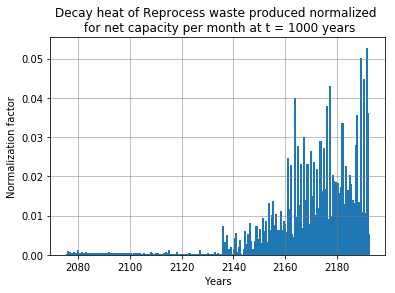

In [92]:
# decay heat produced by sfr reprocess waste normalized by net capacity of sfrs
sfr_decayheat = np.array(decayheat_list)
sfr_power_capacity = np.array(power_list)
sfr_waste_normalized = sfr_decayheat/sfr_power_capacity 

time = timestep/12 + init_year
time2 = time[1400:2800]
sfr_waste_normalized2 = sfr_waste_normalized[1400:2800]
plt.bar(time2,sfr_waste_normalized2)
plt.xlabel('Years')
plt.ylabel('Normalization factor')
plt.title('Decay heat of Reprocess waste produced normalized \n for net capacity per month at t = 1000 years')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()